# Caguioa, JV Bryan DP.

# AI Module 2 Exam

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

from attention import AttentionLayer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
 
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

# Question-1: Abstractive summarization

# a)	Remove abstracts and other figures from the paper and develop an algorithm to show abstractive summarization of each paper. 

**In order to import the dataset, first I converted the pdf to csv. I removed certain parts of the paper (ex. references, headers). The dataset I used in abstractive summarization do not include its abstract section while dataset in extraction summarization does not include the conclusion section.**

**Read Dataset**

In [2]:
data=pd.read_csv("abs_articles.csv")

In [3]:
data['Text'][0]

'Cancer disease has been reported as one of the deadliest genetic maladies of the human genome. It has been the research interest until today by doctors, pathologist, biologist and others life science and health professionals. The World Health Organization (WHO) reported cancer disease having 14 million new cases in 2012. This disease is a major cause or morbidity and mortality that accounts of death globaly resulting 8.8 million deaths in 2015 [1]. The World Cancer Report described cancer as a global problem and projected an increase to 20 million new cases by 2025 [2]. There are several research in cancer classification that used different techniques using gene analysis and classification. The important goal in cancer disease research is to identify the specific genes that caused normal cells to mutate into cancer disease. There are approaches in technology that reveals the cellular and molecular level of cancer. In a cancer disease sample such a cell biopsy to be processed, thousand

In [4]:
data['Text'][1]

"Distracted driving can be seen in some situations where-in the driver diverts his/her attention from activities critical for safe driving [1] and in some situations, this could potentially cause road accidents which are most likely to occur in traffic congested areas. Cognitive, manual, and visual distractions are some factors that affect the driving capabilities of a driver when exposed to prolonged driving [2]. Visual distraction in the context of driving can be determined as activities that take the driver’s eye off the road, except for activities that are necessary in driving such as observing other vehicles or checking side mirrors [3]. The National Highway Traffic Safety Administration (NHTSA) of the U.S.A. has provided guidelines for the public wherein it states that a task that diverts the driver’s visual attention from the road should not exceed 2 seconds [4]. This guideline was based on their previous research of the impact that driver inattention has on near-crash or crash 

In [5]:
data['Text'][2]

'The quality management system (QMS) is considered as an organizational structured that consists of quality procedures, processes and resources which is setup systematically to achieve quality objectives. Today, State Universities and Colleges decided to implement the principles and methodologies of the quality management system for two main reasons. First, is to improve their operations and increase customer’s satisfactions. Second is their wish for formal international recognition to drive corporate reputation. [1] In this paper, the researchers identified the current challenges of the quality assurance department of the academic sectors. First, their quality assurance staff is doing manual classification of digital documents such as audit findings and reports. This normally results to the delay of data analysis and late submission of management reports to the top management. In addition, it creates a bottleneck for a large data to be analyzed in a short period of time and this becom

**Pre-processing**

In [6]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [7]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
                 #it changes the words like haven't to have not
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word; Here we are considering the words only when their length is >=3
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [8]:
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))

In [9]:
def abstract_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:    # it will remove the words like 'k' (may be presented by mistake in the dataset)                            
            newString=newString+i+' '  
    return newString

#Call the above function and pass abstract column from the data set
cleaned_abstract = []
for t in data['Abstract']:
    cleaned_abstract.append(abstract_cleaner(t))

data['cleaned_text']=cleaned_text
data['cleaned_abstract']=cleaned_abstract
data['cleaned_abstract'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

**Adding Start and End token to the Abstract Column**

In [10]:
data['cleaned_abstract'] = data['cleaned_abstract'].apply(lambda x : '_START_ '+ x + ' _END_')

In [11]:
for i in range(3):
    print("Text:",data['cleaned_text'][i])
    print("\n")
    print("Abstract:",data['cleaned_abstract'][i])
    print("\n")

Text: cancer disease reported one deadliest genetic maladies human genome research interest today doctors pathologist biologist others life science health professionals world health organization reported cancer disease million new cases disease major cause morbidity mortality accounts death globaly resulting million deaths world cancer report described cancer global problem projected increase million new cases several research cancer classification used different techniques using gene analysis classification important goal cancer disease research identify specific genes caused normal cells mutate cancer disease approaches technology reveals cellular molecular level cancer cancer disease sample cell biopsy processed thousands genes time subjected analysis single chip called microarray microarrays microscopic slides contain ordered series samples dna rna protein tissue others single chip microarray measure gene expressions gene sample represents human genome challenge cancer classificati

In [12]:
text_word_count = 0       
abstract_word_count = 0  

#get highest count
for a in data['cleaned_text']:
    if len(a.split()) > text_word_count:
        text_word_count = len(a.split())

for a in data['cleaned_text']:
    if len(a.split()) < text_word_count:
        text_word_count = len(a.split())        

#get highest count
for b in data['cleaned_abstract']:
    if len(b.split()) > abstract_word_count:
      abstract_word_count = (len(b.split()))
    
for b in data['cleaned_abstract']:
    if len(b.split()) < abstract_word_count:
      abstract_word_count = (len(b.split()))
    
print("text max length: ",text_word_count)
print("abstract max length: ",abstract_word_count)

text max length:  576
abstract max length:  87


**Splitting the dataset for training and testing**

In [13]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['cleaned_abstract'],test_size=0.1,random_state=0,shuffle=True) 

**tokenizer for Text and Abstract**

In [14]:
def tokenize(train, val, max_length):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(list(train))

    #convert text sequences into integer sequences
    _train    =   tokenizer.texts_to_sequences(train) #Transforms each text in texts to a sequence of integers.
    _val   =   tokenizer.texts_to_sequences(val)

    #padding zero upto maximum length
    _train    =   pad_sequences(_train,  maxlen=max_length, padding='post') 
    _val   =   pad_sequences(_val, maxlen=max_length, padding='post')

    voc_size   =  len(tokenizer.word_index) +1 
    #here we are calcuating vocabulary size. since tokenizer returns unique words.
    #their word indexes always starts with 0. so vocabulary size=length(word_index)+1
    
    return _train, _val, voc_size, tokenizer

In [15]:
x_tr, x_val, x_voc_size, x_tokenizer = tokenize(x_tr, x_val, text_word_count)
y_tr, y_val, y_voc_size, y_tokenizer = tokenize(y_tr, y_val, abstract_word_count)

**Building the model and model compilation**

In [16]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 # Latent dimensionality of the encoding space.

# flow should be like this: Encoder->stacks of LSTM(in our case it is 3)->decoder

# Encoder 
encoder_inputs = Input(shape=(text_word_count,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs)
#passing the vocabulary size of reviews(x_voc_size), latent dim-dimension vector
#encoder_inputs -came from the previous line code

#LSTM 1 since we've decided to use 3 stack layer we've 3 LSTM layers here
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) #see the definition from the above cell
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) #passing embedded words to LSTM.
                       #it always returns the first output, intermediate state and cell state

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) #output from previous state will be passed here

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) #output from previous state will be passed here 
                                                                  #and then produces the final hidden and cell states

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) #there is no specific number of tokens defined for output. That's why shape= none
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) #embedding happening with 
                                                     #the summary column in data set(y_voc)
dec_emb = dec_emb_layer(decoder_inputs) #passing decoder_inputs

#defining decoder LSTM: LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) # defining LSTM
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

attn_layer = AttentionLayer(name='attention_layer') # here it uses global attention-means it consider all words to develop the context vector
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 576)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 576, 500)     414500      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 576, 500), ( 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [17]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 4.9557 - val_loss: 4.9049
Epoch 2/50
1/1 [==============================] - 0s 499ms/step - loss: 4.8745 - val_loss: 5.7637
Epoch 00002: early stopping


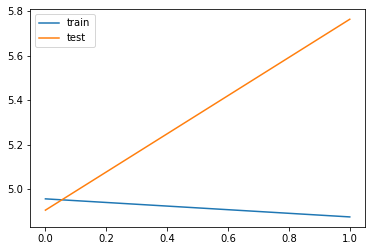

In [18]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show();

**building a dictionary in order to convert index to word**

In [19]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [20]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(text_word_count,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])#concatenate function takes as input a list of tensors, 
#all of the same shape except for the concatenation axis, and returns a single tensor, the concatenation of all inputs.

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [21]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (abstract_word_count-1)):
            stop_condition = True  # ultimately the predicted summary 
                                #should not be greater than the maximum given summary length
                                #that's why the condition >= (max_len_summary-1))

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

# b)	Compare the abstractive summarization result  with the abstract provided in the papers. Show their similarity score. 

In [22]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [23]:
for i in range(len(x_val)):
  print("Text:",seq2text(x_val[i]))
  print("\n")

  original_abstract = seq2summary(y_val[i])
  generated_abstract = decode_sequence(x_val[i].reshape(1,text_word_count))

  print("Original Abstract:",original_abstract)
  print("\n")
  print("Generated Abstract:",generated_abstract)
  print("\n")

Text: quality system considered consists quality processes quality today state quality system two main first increase second formal recognition paper researchers quality first quality manual classification documents results data analysis top data analyzed period time challenge main tasks provide university university data top critical second quality identifying major problem quality however process also challenge terms right model machine learning researchers developed neural models models classify major two neural total number units performance models models main paper development machine learning model help internal identify classify major second researchers learning four neural network models using combined models process based results internal quality conducted university data analysis researchers used version using programming libraries using methods analyze graph dataset using techniques data meanwhile researchers also used software version standard process figure shows visual pr

In [24]:
compare_original_predicted = [original_abstract,generated_abstract]

In [25]:
import gensim
from gensim.matutils import softcossim 
from gensim import corpora
import gensim.downloader as api 
from gensim.utils import simple_preprocess

In [26]:
# Download the FastText model
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

In [27]:
# Prepare a dictionary and a corpus.
dictionary = corpora.Dictionary([simple_preprocess(doc) for doc in compare_original_predicted])

# Prepare the similarity matrix
similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)

# Convert the sentences into bag-of-words vectors.
orig_abs = dictionary.doc2bow(simple_preprocess(original_abstract))
gen_abs = dictionary.doc2bow(simple_preprocess(generated_abstract))

#printing the result
similarityScore = softcossim(orig_abs, gen_abs, similarity_matrix)
print('Similarity score between the original abstract and the generated abstract is {:.1%}'.format(similarityScore))

Similarity score between the original abstract and the generated abstract is 85.4%


*The similarity score is fairly high but when you look at the actual results, there is no evident on its similarity therefore I the similarity score is not accurate or I fed the wrong data to it*

# Question-2: Extractive Summarization

# a)	Use the same journal papers used in question-1 to derive extractive summarization of each paper.

**Read Dataset**

In [28]:
df_cancer = pd.read_csv("cancer_mod.csv")
df_dist = pd.read_csv("distraction_mod.csv")

In [29]:
df_cancer.head()

,Text,Abstract
0,"Cancer disease has been reported as one of the deadliest genetic maladies of the human genome. It has been the research interest until today by doctors, pathologist, biologist and others life scie...",The World Cancer Report described cancer as a global problem because it affects the whole greater population. There will be a projected increase to 20 million new cases by 2025 [2]. There are seve...


In [30]:
df_dist.head()

,Text,Abstract
0,"Distracted driving can be seen in some situations where-in the driver diverts his/her attention from activities critical for safe driving [1] and in some situations, this could potentially cause r...",Factors related to distraction have been one of the major causes of accidents related to driving. This paper presents a model that detects distraction cues of a Grab driver that mainly focuses on ...


**split article into sentences**

In [31]:
for s in df_cancer['Text']:
    sentences_cancer = sent_tokenize(s)
    
for s in df_dist['Text']:
    sentences_dist  = sent_tokenize(s)

In [32]:
sentences_cancer[:5]

['Cancer disease has been reported as one of the deadliest genetic maladies of the human genome.',
 'It has been the research interest until today by doctors, pathologist, biologist and others life science and health professionals.',
 'The World Health Organization (WHO) reported cancer disease having 14 million new cases in 2012.',
 'This disease is a major cause or morbidity and mortality that accounts of death globaly resulting 8.8 million deaths in 2015 [1].',
 'The World Cancer Report described cancer as a global problem and projected an increase to 20 million new cases by 2025 [2].']

In [33]:
sentences_dist[:5]

['Distracted driving can be seen in some situations where-in the driver diverts his/her attention from activities critical for safe driving [1] and in some situations, this could potentially cause road accidents which are most likely to occur in traffic congested areas.',
 'Cognitive, manual, and visual distractions are some factors that affect the driving capabilities of a driver when exposed to prolonged driving [2].',
 'Visual distraction in the context of driving can be determined as activities that take the driver’s eye off the road, except for activities that are necessary in driving such as observing other vehicles or checking side mirrors [3].',
 'The National Highway Traffic Safety Administration (NHTSA) of the U.S.A. has provided guidelines for the public wherein it states that a task that diverts the driver’s visual attention from the road should not exceed 2 seconds [4].',
 'This guideline was based on their previous research of the impact that driver inattention has on nea

**Import word embeddings**

In [34]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

**Text Preprocessing**

In [35]:
#cancer dataset
clean_sentences_cancer = pd.Series(sentences_cancer).str.replace("[^a-zA-Z]", " ")
clean_sentences_cancer = [s.lower() for s in clean_sentences_cancer]

#distraction dataset
clean_sentences_dist = pd.Series(sentences_dist).str.replace("[^a-zA-Z]", " ")
clean_sentences_dist = [s.lower() for s in clean_sentences_dist]

In [36]:
stop_words = stopwords.words('english')
def cleanSentences(text):
    removeStopWords = []
    newSentence = []
    
    newText = text.lower()
    newText = newText.split(' ')
    newText = BeautifulSoup(newText, "lxml").text
    newText = re.sub(r'\([^)]*\)', '', newText)
    newText = re.sub('"','', newText)
    newText = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newText.split(" ")])    
    newText = re.sub(r"'s\b","",newText)
    newText = re.sub("[^a-zA-Z]", " ", newText) 
    
    
    removeStopWords = [i for i in newText if i not in stopWords]
    
    for i in removeStopWords:
        if i in contraction:
            newSentence.append(contraction[i])
        else:
            newSentence.append(i)
    newSentence = ' '.join(newSentence)
    newSentence = newSentence.replace("<br />","")
    newSentence = re.sub("[^a-z. ]", "", newSentence) 
    return newSentence

In [37]:
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [38]:
clean_sentences_cancer = [remove_stopwords(r.split()) for r in clean_sentences_cancer]
clean_sentences_dist = [remove_stopwords(r.split()) for r in clean_sentences_dist]

**Vector Representation of Sentences**

In [39]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [40]:
sentence_vectors_cancer = []
for i in clean_sentences_cancer:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors_cancer.append(v)

sentence_vectors_dist = []
for i in clean_sentences_dist:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors_dist.append(v)

**Similarity Matrix Preparation**

In [41]:
sim_mat_cancer = np.zeros([len(sentences_cancer), len(sentences_cancer)])
sim_mat_dist = np.zeros([len(sentences_dist), len(sentences_dist)])

In [42]:
for i in range(len(sentences_cancer)):
  for j in range(len(sentences_cancer)):
    if i != j:
      sim_mat_cancer[i][j] = cosine_similarity(sentence_vectors_cancer[i].reshape(1,100), sentence_vectors_cancer[j].reshape(1,100))[0,0]
    
for i in range(len(sentences_dist)):
  for j in range(len(sentences_dist)):
    if i != j:
      sim_mat_dist[i][j] = cosine_similarity(sentence_vectors_dist[i].reshape(1,100), sentence_vectors_dist[j].reshape(1,100))[0,0]

**Apply PageRank Algorithm**

In [43]:
nx_graph_cancer = nx.from_numpy_array(sim_mat_cancer)
scores_cancer = nx.pagerank(nx_graph_cancer)

nx_graph_dist = nx.from_numpy_array(sim_mat_dist)
scores_dist = nx.pagerank(nx_graph_dist)

**Summary Extraction**

In [44]:
ranked_sentences_cancer = sorted(((scores_cancer[i],s) for i,s in enumerate(sentences_cancer)), reverse=True)
ranked_sentences_dist = sorted(((scores_dist[i],s) for i,s in enumerate(sentences_dist)), reverse=True)

In [45]:
# Extract top 10 sentences as the summary of cancer dataset
for i in range(10):
  print(ranked_sentences_cancer[i][1])

The process of obtaining the best model for predicting disease classes from a given raw data set collected by scanning genetic microarrays from 72 patients, each suffering from one of the strains of cancer (leukemia).
The scope of this paper is to present the cancer classification using machine learning models.This paper mainly explored and analyzed published papers about the topic.
There are several research in cancer classification that used different techniques using gene analysis and classification.
In a cancer disease sample such a cell biopsy to be processed, thousands of genes at a time can be subjected for analysis in a single chip called microarray.
The challenge of cancer classification using the microarray is the application of model based selection and prediction algorithm that will classify the cancer genes using gene expression data.
Using linear method T-values, this reduced the number of genes for the training model.
The test set contains 6627 unique values of genes fro

In [46]:
# Extract top 10 sentences as the summary of distraction dataset
for i in range(10):
  print(ranked_sentences_dist[i][1])

The process is repeated k times, with each time making use of a different subset as the testing data.
This specific driver set was the set chosen as training data as a result of the K-Fold Validation.
However, comparing the model’s output to actual data in training can have one of four outcomes.
However, Fmeasure allows for a better classification of the predictive power of the model instead of just assessing how much the model got right.
The results from this study signify that the combination of facial landmarks, eye gaze, and action units provide a detection power of 95% for the specific data that was tested on.
A True Negative detection on the other hand signifies a point in the video wherein it was not annotated to be a distraction, and the model does not detect this as well.
This results in a better accuracy by compute time will also be increased due to the repetitive action.
In line with this, the model was subjected to assess whether it is the right fit for the sample data obta

# b)	Compare conclusion part from the papers with the extractive summarization result. Provide the similarity score. 

In [47]:
gloveFile = "glove.6B.100d.txt"

def loadGloveModel(gloveFile):
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    return model

def preprocess(raw_text):

    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    words = letters_only_text.lower().split()
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('The similarity between the generated and actual conclusion is',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    fig, ax = plt.subplots(figsize=(10,10)) 
    ax_blue = sns.heatmap(df, cmap="Greens")
    return ax_blue

In [48]:
generated_conclusion_cancer = ranked_sentences_cancer[i][1]
actual_conclusion_cancer = """This paper presented the gene expression data analysis and
classify the results based on the cancer dataset. The literature
analysis presented cancer classification using gene expression
was still a topic on interest by most researchers in this field. The
survey analysis of the cancer classification model evaluation presented the 
advantage and disadvantages of each. Gene selection is an important phase in 
the preprocessing and cancer classification. This paper demonstrated the
cancer classification model and applied the SVM and Boosting that provide 
insights of their application in the gene expression data. The performance and
accuracy reported having 58% and 64% can indicate that the
experiment can be improved and comparable to other results of published literatures.
The next step is to investigate the cancer classification
techniques specific to cancer genome or type of cancer disease
using the other machine learning a nd deep learning techniques.
Python packages can be programmed based on the model
presented will be the next step. The application of artificial
intelligence can be considered as the next step as our research
in cancer classification in histology, digital oncology and
pathology."""

In [49]:
generated_conclusion_dist = ranked_sentences_dist[i][1]
actual_conclusion_dist = """The study presents proof that eye gaze in relation to the driver’s
head pose, action units, and facial landmarks on the lips signify a
viable parameter for use in detecting distraction cues. These
attributes provide sufficient information to create a model with a
95% detection power. This model feature (Feature C) produces
the highest detection power out of the three considered model
features. It combined the raw outputs of the k-NN classifier and
subjected into a clustering and time restriction algorithm. The
ceiling at 95% detection power (F-measure) can be attributed to
human errors associated in the annotation of the video. In addition,
the model’s detection power is limited by the ability of the feature
extraction software to accurately determine the values
of the driver’s face. Positions wherein the driver’s face is
completely facing the side returns invalid values, rendering the
prediction model unable to classify such an occurrence.
Furthermore, drivers whose facial movements are very minute and
limited decrease the accuracy of the model since it relies on
distinguishable eye movements and head pose orientations.
Future work on improving the model could be through triggering
specific instances of distraction for the model to be trained
accordingly. Factors such as light and shadow in extreme values
hinder the detection capability. A higher quality camera could be
used for a more accurate detection of facial features. Different
frame rates in rendering the output video could be used to see if
there are changes in the detection power if frame rates are reduced
or increased. A different feature extraction software or toolkit
could be used to extract facial values to see the difference in the
capabilities of the two models. The inclusion of auditory cues is
an extension possibility of this model since it currently only
focuses on what is visual. Integrating these could create a model
that yields better results."""

The similarity between the generated and actual conclusion is 82.72 %


<AxesSubplot:>

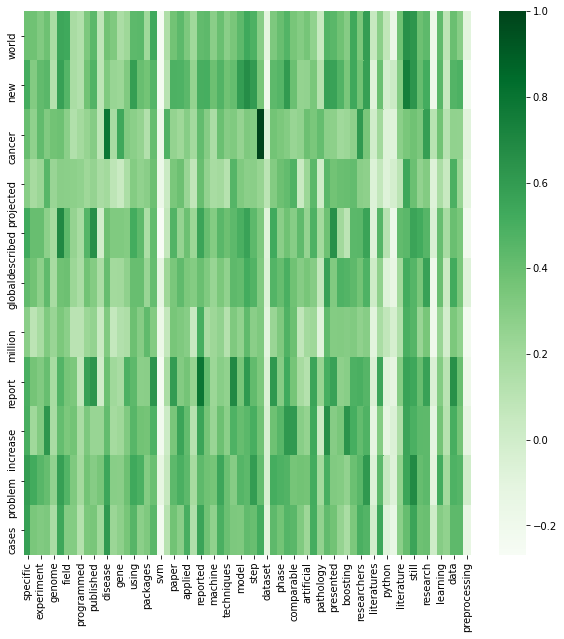

In [50]:
model = loadGloveModel(gloveFile)
cosine_distance_wordembedding_method(generated_conclusion_cancer,actual_conclusion_cancer)
heat_map_matrix_between_two_sentences(generated_conclusion_cancer,actual_conclusion_cancer)

The similarity between the generated and actual conclusion is 93.02 %


<AxesSubplot:>

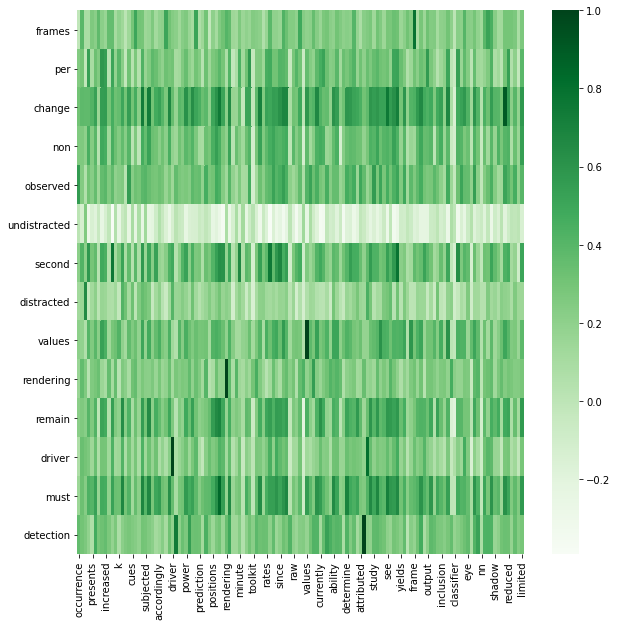

In [51]:
model = loadGloveModel(gloveFile)
cosine_distance_wordembedding_method(generated_conclusion_dist,actual_conclusion_dist)
heat_map_matrix_between_two_sentences(generated_conclusion_dist,actual_conclusion_dist)

*The function in order to find the similarity score between the generated and actual conclusion shows a high score. this could be true as you can see when you manually inspect the actual and generated values, you could find similiar words*

# c)	Compare the results of question-1 and Question-2 to show how similar/dissimilar in terms of their summary. Provide similarity score. Write a conclusion about the result

*results in the question 2 is much consistent than results in question 1. question 2 similarity score somewhat reflects the actual result while question 1 results shows a discrepancy between similarity score and the manual checking. this is probably because of bad implementation on stopwords on generation of abstract. Not only that, PageRank algorithm is much easier to understand and implement compared to LSTM as you need provide optimal parameters and to train it which will take a lot of time.*